In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('spam.csv')

In [3]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data['Category'] = data['Category'].map({'ham':0, 'spam':1})

In [7]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 1. Data Cleaning

In [8]:
#missing values
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
#check for duplicate values
data.duplicated().sum()

415

In [10]:
#remove duplicates
data = data.drop_duplicates(keep = 'first')

In [11]:
data.shape

(5157, 2)

# 2. Exploratory Data Analysis(EDA)

In [12]:
data['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

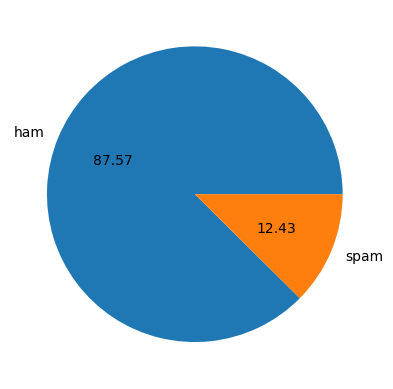

In [13]:
import matplotlib.pyplot as plt
plt.pie(data['Category'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [14]:
#We have to find the no. of words, sentences from the message

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MADHUMITA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
data['num_char']=data['Message'].apply(len)

C:\Users\MADHUMITA\AppData\Local\Temp\ipykernel_6232\4023826797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_char']=data['Message'].apply(len)


In [17]:
data

,Category,Message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [18]:
#find the num of words
data['num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\MADHUMITA\AppData\Local\Temp\ipykernel_6232\1323765222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [19]:
data

,Category,Message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will ü b going to esplanade fr home?,36,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [20]:
data['num_sent'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\MADHUMITA\AppData\Local\Temp\ipykernel_6232\2298292575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sent'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [21]:
data

,Category,Message,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [22]:
data[['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
#for ham
data[data['Category'] == 0][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
#for spam
data[data['Category'] == 1][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [25]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

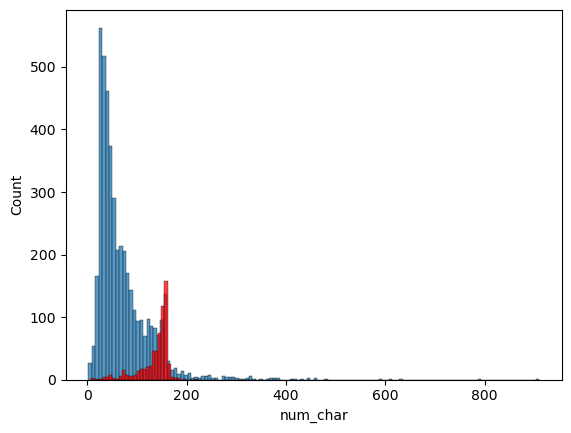

In [26]:
sns.histplot(data[data['Category'] == 0]['num_char'])
sns.histplot(data[data['Category'] == 1]['num_char'], color='red')

In [23]:
#The above histogram shows that the n0. of char used in ham mails is more than the no. of chars used in spam mails

# 3. Data preprocessing

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MADHUMITA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [31]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    #to remove special characters such as (%, !, #, $, &)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    #to remove the stop words
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    #for stemming
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [32]:
text_transform("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [33]:
data['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [34]:
data['transformed_text'] = data['Message'].apply(text_transform)

C:\Users\MADHUMITA\AppData\Local\Temp\ipykernel_6232\1851191191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['Message'].apply(text_transform)


In [35]:
data.head()

,Category,Message,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
!pip install wordcloud

In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [38]:
spam_wc = wc.generate(data[data['Category'] == 1]['transformed_text'].str.cat(sep=" "))

ImportError: The _imagingft C module is not installed

In [39]:
#to get the 30 most common word used in spam mails 
spam_corpus = []
for msg in data[data['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [40]:
len(spam_corpus)

9781

C:\Users\MADHUMITA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


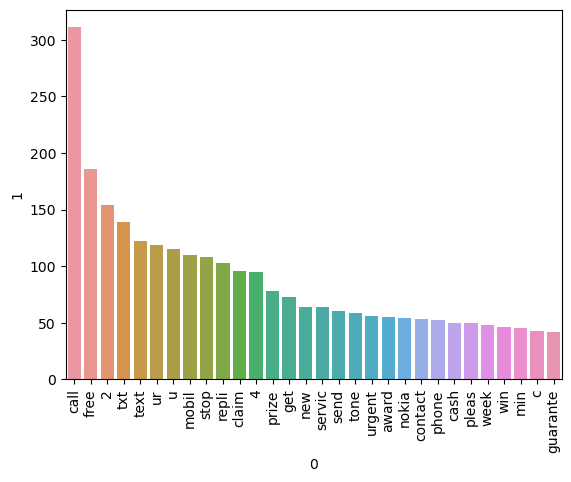

In [41]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
#to get the 30 most common word used in ham mails 
ham_corpus = []
for msg in data[data['Category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
    

In [43]:
len(ham_corpus)

35930

C:\Users\MADHUMITA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


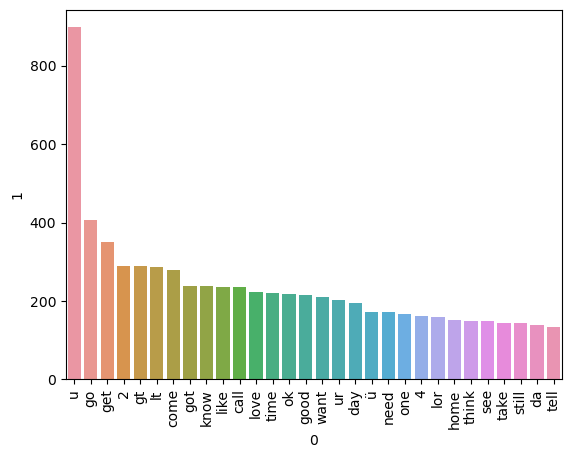

In [44]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [63]:
#Here we are using Naive Bayes Alogrithm. So to use Naive Bayes we need to convert our input data(Message) to numeric format
#i.e we will perform text vectorization using Bag of Words

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer()

In [46]:
X = tfid.fit_transform(data['transformed_text']).toarray()

In [47]:
X.shape

(5157, 6781)

In [48]:
Y = data['Category'].values

In [49]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_test, X_train, Y_test, Y_train = train_test_split(X,Y,test_size=0.2, random_state=2)

In [52]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
gnb.fit(X_train, Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred1))
print(confusion_matrix(Y_test, y_pred1))
print(precision_score(Y_test, y_pred1))

0.8848484848484849
[[3257  354]
 [ 121  393]]
0.5261044176706827


In [55]:
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test, y_pred2))
print(precision_score(Y_test, y_pred2))

0.8945454545454545
[[3611    0]
 [ 435   79]]
1.0


In [56]:
bnb.fit(X_train, Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, y_pred3))
print(confusion_matrix(Y_test, y_pred3))
print(precision_score(Y_test, y_pred3))

0.8768484848484849
[[3609    2]
 [ 506    8]]
0.8


In [57]:
import pickle
pickle.dump(tfid, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))